# Project:Investigate a Dataset (TMDB Dataset Investigation)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This data set contains information about +10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

● Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.

● There are some odd characters in the ‘cast’ column, which will be left as is.

● The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


#### Q:How has Popularity evolved over the years ?
#### Q:Which genres are most popular ? 
#### Q:What kinds of properties are associated with movies that have high revenues?
#### Q: Who are the Directors of most successful movies in terms of revenue?

In [1]:
# importing libraries for Data analysis and visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
#setting Visualization options (style & figure size )
sb.set_style('whitegrid')
plt.rcParams['figure.figsize']= 8,8

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [3]:
# Loading data using pandas pd.read_csv
#Printing the 1st 5 rows of the dataframe
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


### Data description for some of the columns (source [IMDB HelpCenter](https://help.imdb.com/?ref_=helphdr_helphome))


|__Feature__| __Description__|
|------     |:---------------|
|Popularity |[Pop. calculation according to IMDB](https://help.imdb.com/article/imdbpro/industry-research/starmeter-moviemeter-and-companymeter-faq/GSPB7HDNPKVT5VHC#) : IMDbPro uses proprietary algorithms that take into account several measures of popularity for people, titles and companies. The primary measure is who and what people are looking at on IMDb.|
|Tagline    |A tagline is a short description or comment on a movie that is displayed on movie posters|
|Genre|  is a category of artistic composition, characterized by similarities in form, style, or subject matter. More specifically, a film genre is a motion picture category based on the narrative elements that relate to the main driving force behind the story arc.An easy way to identify the elements of genre is to piece together the narrative arc:Story (Action) + Plot + Character + Setting = Genre|
|Average Vote | weighted vote averages rather than raw data averages|


In [4]:
#Checking for null values and Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [13]:
# Specifying Which columns have missing Data
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [4]:
#Checking Dataframe statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [4]:
# Printing Column names in order for exploration
for i, v in enumerate (df):
    print (i , v)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


In [4]:
# Checking values in the revenue_adjusted column. 
df.revenue_adj.value_counts() 

0.000000e+00    6016
1.438914e+07       2
5.766759e+07       2
1.000000e+06       2
2.093547e+08       2
                ... 
7.036068e+07       1
2.714497e+07       1
7.694895e+07       1
1.087002e+06       1
1.062776e+09       1
Name: revenue_adj, Length: 4840, dtype: int64

In [5]:
# Checking values in the revenue_adjusted column. 
df.budget_adj.value_counts() 

0.000000e+00    5696
1.016400e+07      17
2.103337e+07      17
2.000000e+07      16
4.605455e+06      15
                ... 
4.658819e+06       1
6.641668e+07       1
2.289547e+07       1
2.206182e+06       1
2.264205e+06       1
Name: budget_adj, Length: 2614, dtype: int64

In [6]:
#checking for duplicated values in the Dataframe
df.duplicated().sum()

1

In [7]:
# Checking values in the Movies runtime column. 
df.runtime.value_counts(bins=(0, 100, 150, 200, 900))

(-0.001, 100.0]    5949
(100.0, 150.0]     4574
(150.0, 200.0]      270
(200.0, 900.0]       73
Name: runtime, dtype: int64

In [8]:
# Query about a movie with 900 minutes (Documentary)
df.loc[df['runtime'] == 900]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,125336,tt2044056,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,http://www.channel4.com/programmes/the-story-o...,Mark Cousins,NaN,...,"The Story of Film: An Odyssey, written and dir...",900,Documentary,NaN,9/3/11,14,9.2,2011,0.0,0.0


### Data Quality Issues:
1- Release_date and release year Columns are not in Datetime Format.

2- Missing values in some Columns (imdb_id,cast, homepage, director,tagline, keywords ,overview ,genres, production_companies)

3- Revenue and budget (also Rev_adj + Budget adj) columns have more that 6000 rows with zero values and some other inconsistenet values in float format

4 -There's One Duplicated record which should be omitted

5 -Original_title column has some errors in characters (e.g $, Sheâ€™s Funny That Way)

6 -There are -ve values in Popularity & runtime columns 

7- Columns with alot of missing values or unnecessary for analysis need to be dropped (Homepage , Tagline, Revenue and budget, overview) 

8- Budget_adj and Revenue_adj Columns can be adjusted in millions for better analysis then renaming the columns to be in millions

9- Popularity Column can be rounded to 2 dicimals instead of 6

10-Columns (genre and director) are pipe dilimited, so each element needs to be transformed into a row.

### Making a copy of the original dataframe

In [4]:
#Code to copy the original DF
df_cleaned = df.copy()


### Data Cleaning :

In [5]:
# 1- Release_date Column is not in Datetime Format
# code using pandas to_datetime
df_cleaned['release_date'] = pd.to_datetime(df_cleaned['release_date'])

In [6]:
# Test
df_cleaned.release_date.head(2)

0   2015-06-09
1   2015-05-13
Name: release_date, dtype: datetime64[ns]

In [7]:
# Changing Release_year column to datetime format instead of int 64
pd.to_datetime(df_cleaned['release_year']).dt.strftime('%Y')
#Test
df_cleaned['release_year']

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
10861    1966
10862    1966
10863    1966
10864    1966
10865    1966
Name: release_year, Length: 10866, dtype: int64

In [8]:
# 2- removing Duplicated record
# Code
df_cleaned.drop_duplicates(inplace=True)

In [9]:
#Test
df_cleaned.duplicated().sum()

0

In [10]:
# 3- Dropping un-necessary columns of excessive missing values (Homepage , Tagline, ...)
# Code
df_cleaned.drop(['homepage','tagline','revenue', 'budget', 'overview'], axis=1, inplace=True)

In [12]:
#Test
df_cleaned.head(2)

,id,imdb_id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


In [11]:
# 4 - Budget and Revenue Columns can be adjusted as smaller floats per million for better analysis
df_cleaned['budget_adj'] = df_cleaned['budget_adj'] // 1000000
# Test
df_cleaned['budget_adj']

0        137.0
1        137.0
2        101.0
3        183.0
4        174.0
         ...  
10861      0.0
10862      0.0
10863      0.0
10864      0.0
10865      0.0
Name: budget_adj, Length: 10865, dtype: float64

In [12]:
#Code
df_cleaned['revenue_adj'] = df_cleaned['revenue_adj'] // 1000000
#Test
df_cleaned['revenue_adj']

0        1392.0
1         348.0
2         271.0
3        1902.0
4        1385.0
          ...  
10861       0.0
10862       0.0
10863       0.0
10864       0.0
10865       0.0
Name: revenue_adj, Length: 10865, dtype: float64

In [13]:
# Renaming Budget_adj and Revenue_adj columns 
#Code
df_cleaned.rename(columns={'budget_adj':'budget_adj_million'}, inplace=True)
df_cleaned.rename(columns={'revenue_adj':'revenue_adj_million'}, inplace=True)

In [14]:
#Test
df_cleaned.head(2)

,id,imdb_id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj_million,revenue_adj_million
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137.0,1392.0
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137.0,348.0


In [15]:
# 5 - Popularity Column can be rounded to 2 dicimals instead of 6
df_cleaned['popularity'] = df_cleaned['popularity'].round(2)

In [16]:
#Test
df_cleaned['popularity']

0        32.99
1        28.42
2        13.11
3        11.17
4         9.34
         ...  
10861     0.08
10862     0.07
10863     0.07
10864     0.06
10865     0.04
Name: popularity, Length: 10865, dtype: float64

In [17]:
# 6 - Column (genre) is pipe dilimited , using Pandas Explode we'll transform each element of a list-like to a row
df_cleaned = df_cleaned.assign(genre=df_cleaned['genres'].str.split('|')).explode('genre')

In [20]:
#Test
df_cleaned.head(2)

,id,imdb_id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj_million,revenue_adj_million,genre
0,135397,tt0369610,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137.0,1392.0,Action
0,135397,tt0369610,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137.0,1392.0,Adventure


In [18]:
# Column (Director) is also pipe dilimited , using Pandas Explode we'll transform each element of a list-like to a row
df_cleaned = df_cleaned.assign(director = df_cleaned['director'].str.split('|')).explode('director')
#Test
df_cleaned.head(2)

,id,imdb_id,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj_million,revenue_adj_million,genre
0,135397,tt0369610,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137.0,1392.0,Action
0,135397,tt0369610,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137.0,1392.0,Adventure


In [19]:
# 7-Removing Null values in the rest of the dataset
#Code
df_cleaned = df_cleaned.dropna()
#Test
df_cleaned.isnull().sum()

id                      0
imdb_id                 0
popularity              0
original_title          0
cast                    0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj_million      0
revenue_adj_million     0
genre                   0
dtype: int64

# Storing the Clean Data

In [20]:
#saving a clean DF for Exploratory Data analysis
df_cleaned.to_csv('tmdb_cleaned.csv', index=False)

<a id='eda'></a>
# Exploratory Data Analysis


### Research Question 1 :(How has Popularity evolved over the years  ?)

In [36]:
# Checking Value count in Popularity Column
df_cleaned.popularity.value_counts(bins=3)

(-0.034, 10.997]    24162
(10.997, 21.993]       23
(21.993, 32.99]        11
Name: popularity, dtype: int64

##### Most of the popularity Scores are between [0,10] , However as stated in the [IMDB](https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV?ref_=helpsrall#ratings) website help center, user ratings are between ( 1 - 10 ) a higher score indicates a better score for the movie 

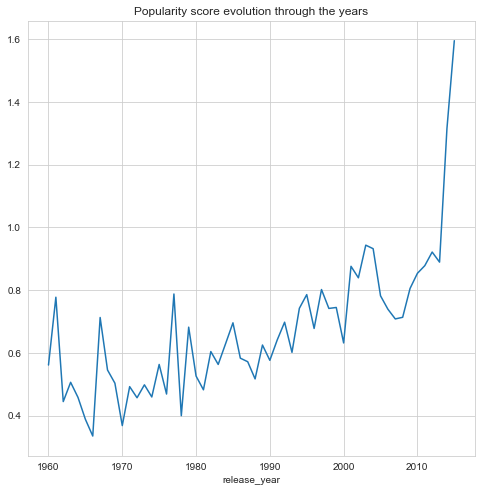

In [21]:
#plotting popularity score through the years using groupby 
df_cleaned.groupby(by = 'release_year')['popularity'].mean().plot()
plt.title('Popularity score evolution through the years');

##### Popularity increased drastically after 2010, that's due to wide use of internet services and increasing social media awareness

### Research Question 2 :(Which genres are most popular ?)

In [102]:
# Checking the first 15 most common genres
df_cleaned.genre.value_counts()

Drama              4138
Comedy             3358
Thriller           2584
Action             2182
Horror             1538
Romance            1483
Adventure          1422
Crime              1234
Family             1149
Science Fiction    1125
Fantasy             860
Animation           758
Mystery             722
Music               345
Documentary         344
History             310
War                 262
Western             162
TV Movie            121
Foreign              99
Name: genre, dtype: int64

In [103]:
# Checking unique values for genre column
df_cleaned.genre.nunique()

20

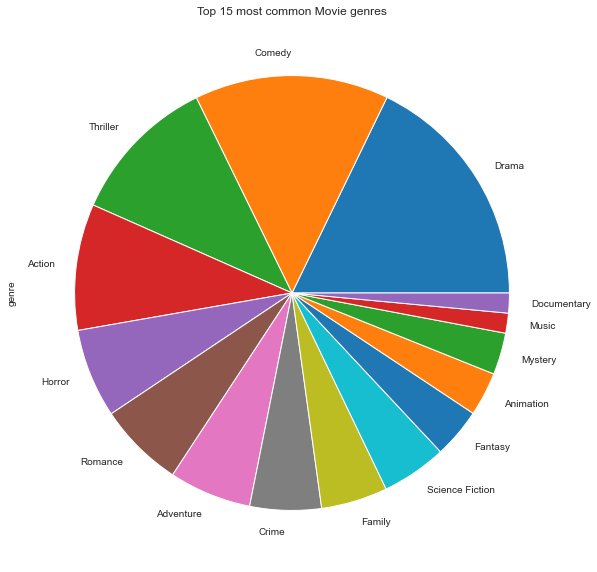

In [56]:
# plotting a pie chart for top 15 common genres
df_cleaned.genre.value_counts()[:15].plot(kind = 'pie', figsize = (10,10))
plt.title('Top 15 most common Movie genres');

In [22]:
# Slicing genres of higher popularity together with release year 
df_genre = df_cleaned[['popularity', 'genre', 'release_year', 'original_title']]
# Sorting Values by Popularity
df_genre.sort_values(by ='popularity', ascending = False)[:25]

,popularity,genre,release_year,original_title
0,32.99,Action,2015,Jurassic World
0,32.99,Thriller,2015,Jurassic World
0,32.99,Adventure,2015,Jurassic World
0,32.99,Science Fiction,2015,Jurassic World
1,28.42,Action,2015,Mad Max: Fury Road
1,28.42,Adventure,2015,Mad Max: Fury Road
1,28.42,Science Fiction,2015,Mad Max: Fury Road
1,28.42,Thriller,2015,Mad Max: Fury Road
629,24.95,Science Fiction,2014,Interstellar
629,24.95,Drama,2014,Interstellar


In [23]:
# Grouping genres by popularity
df_grouped = df_genre.groupby('genre')['popularity'].sum().reset_index(name='sum').sort_values(by ='sum', ascending = False)

In [32]:
# printing the new grouped genre df
df_grouped

,genre,sum
6,Drama,2709.56
3,Comedy,2331.33
0,Action,2266.95
17,Thriller,2110.24
1,Adventure,1839.19
15,Science Fiction,1271.59
7,Family,1136.48
14,Romance,991.37
4,Crime,986.97
8,Fantasy,959.10


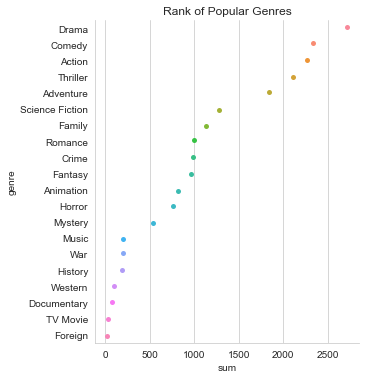

In [34]:
#plotting a categorical graph for most popular genres
sb.catplot(y= 'genre',x='sum', data=df_grouped)
plt.title('Rank of Popular Genres');

##### Note : Top Popular Genres are Drama, Comedy, Action, Thriller	

### Research Question 3 :(What kinds of properties are associated with movies that have high revenues?)

In [82]:
#checking bins of most successful movies in terms of revenue
df_cleaned.revenue_adj_million.value_counts(bins=3)

(-2.828, 942.333]      23997
(942.333, 1884.667]      179
(1884.667, 2827.0]        20
Name: revenue_adj_million, dtype: int64

In [52]:
# Creating a separate dataframe for top 50 highest revenue movies, then sorting revenue values in descending order
df_rev = df_cleaned.loc[df_cleaned['revenue_adj_million'] >= 942]
df_rev = df_rev.sort_values(by = 'revenue_adj_million', ascending = False)

In [84]:
#checking Unique values in the revenue Data Frame
df_rev.nunique()

id                      53
imdb_id                 53
popularity              52
original_title          53
cast                    50
director                43
keywords                53
runtime                 41
genres                  39
production_companies    44
release_date            53
vote_count              53
vote_average            20
release_year            31
budget_adj_million      43
revenue_adj_million     52
genre                   14
dtype: int64

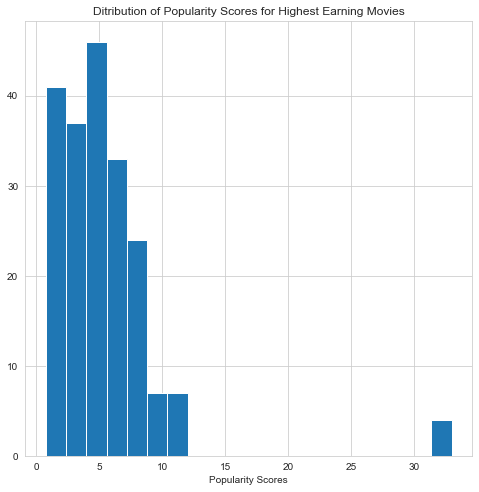

In [53]:
# Checking Popularity scores for the most profitable movies with a histogram 
df_rev.popularity.hist(bins=20)
plt.title('Ditribution of Popularity Scores for Highest Earning Movies')
plt.xlabel('Popularity Scores');

##### Note :Most of the successful movies in terms of revenue have average popularity scores

In [54]:
# Further slicing of numerical data (in the most profitable movies) to check their correlation using numpy (np.r_)
# to choose multiple column indices
X = df_rev.iloc[:, np.r_[2, 7, 11:13, 14:16]]
X[:5]

,popularity,runtime,vote_count,vote_average,budget_adj_million,revenue_adj_million
1386,9.43,162,8458,7.1,240.0,2827.0
1386,9.43,162,8458,7.1,240.0,2827.0
1386,9.43,162,8458,7.1,240.0,2827.0
1386,9.43,162,8458,7.1,240.0,2827.0
1329,12.04,121,4428,7.9,39.0,2789.0


In [87]:
# Checking Duplicated records
X.duplicated().sum()

146

In [55]:
#dropping all duplicated records 
X.drop_duplicates(inplace=True)

<ipython-input-55-271da1f7973b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop_duplicates(inplace=True)


In [89]:
#Test
X.shape

(53, 6)

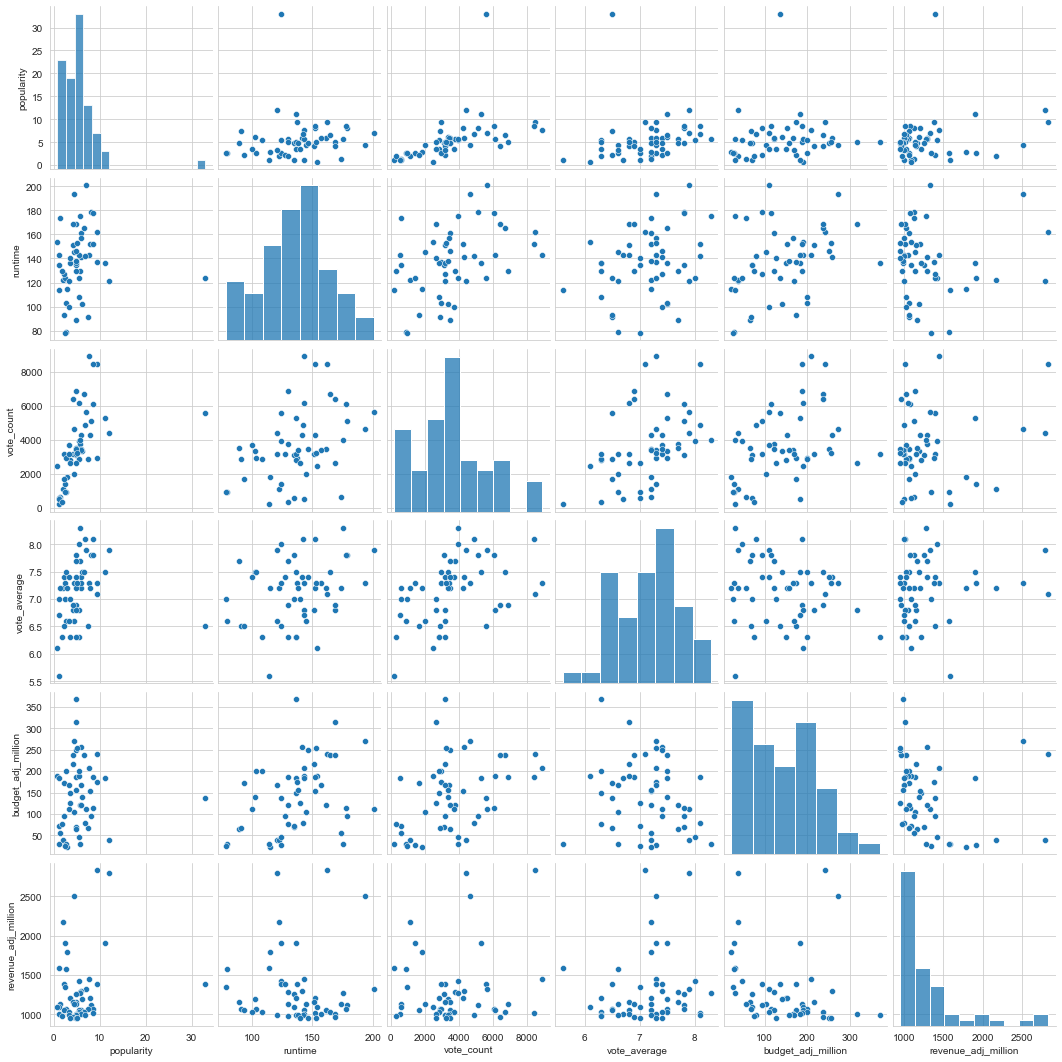

In [56]:
# plotting a matrix for the most profitable movies
sb.pairplot(X)

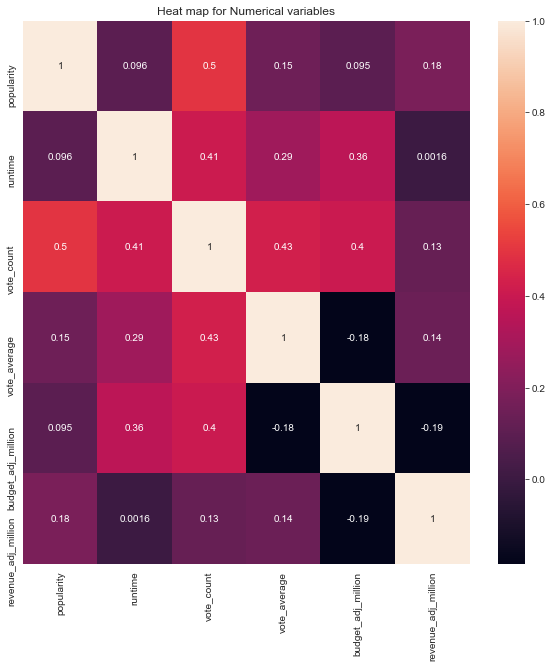

In [57]:
# plotting a heat map to explore correlation
plt.subplots(figsize = (10,10))
sb.heatmap(X.corr(), annot=True)
plt.title('Heat map for Numerical variables');

##### Note : High correlation between (Vote_count & Vote_average), (Vote_count & runtime) then (Vote_count & Budget_adj) 

In [92]:
#checking genres of the most successful movies
df_rev.genre.value_counts()[:5]

Adventure          45
Action             28
Family             26
Fantasy            23
Science Fiction    17
Name: genre, dtype: int64

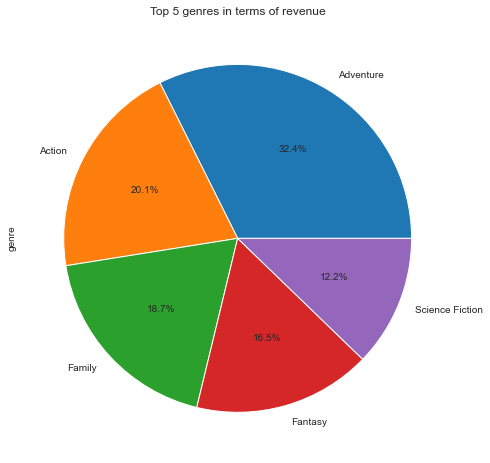

In [93]:
#Plotting top 5 highest revenue genres
df_rev.genre.value_counts()[:5].plot(kind = 'pie', autopct ='%0.1f%%')
plt.title('Top 5 genres in terms of revenue');

##### Note: Most successful movies genres are ( Adventure, Action, Family , Fantasy and Sci Fi)

In [94]:
# slicing df_rev dataFrame excluding the last column (genre)
df_rev= df_rev.iloc[:, :16]

In [98]:
# Dropping Duplicates in revenue Data frame
df_rev.drop_duplicates(inplace=True)

In [99]:
# Runtime values of highest earning movies are between (90 : 180 minutes)
df_rev.runtime.value_counts(bins=3)

(119.0, 160.0]                31
(77.87599999999999, 119.0]    19
(160.0, 201.0]                11
Name: runtime, dtype: int64

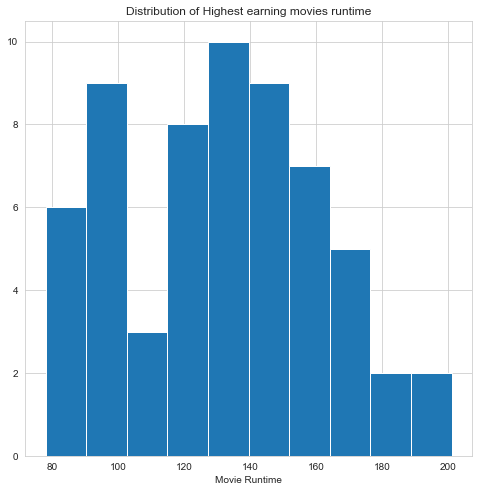

In [100]:
# plotting a histogram for the highest earning movies runtime 
df_rev.runtime.hist()
plt.title('Distribution of Highest earning movies runtime')
plt.xlabel('Movie Runtime');

##### Most movies runtime values are between 90 & 180

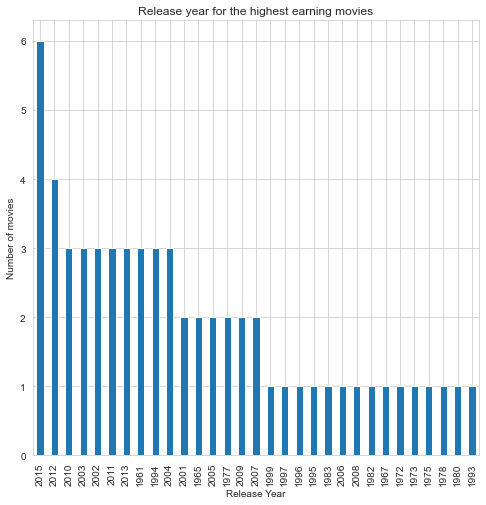

In [101]:
#Plotting a bat chart for the release year for the highest earning movies
df_rev.release_year.value_counts().plot(kind ='bar')
plt.title('Release year for the highest earning movies')
plt.xlabel('Release Year')
plt.ylabel('Number of movies');

##### Note : 2015 was the most successful year in the production of Movies

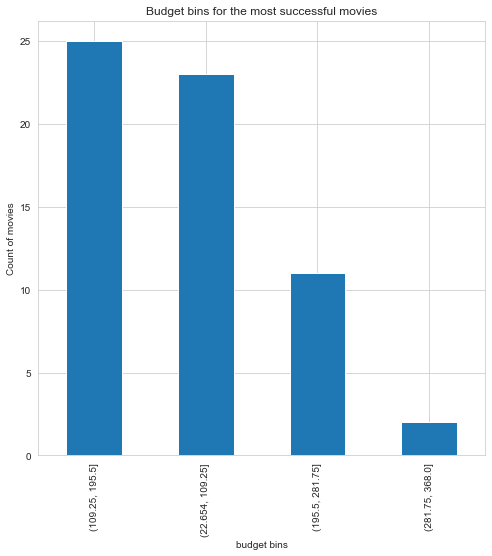

In [102]:
#plotting a bar graph of [budget bins] for the most successful movies
df_rev.budget_adj_million.value_counts(bins=4).plot(kind = 'bar')
plt.title('Budget bins for the most successful movies')
plt.xlabel('budget bins')
plt.ylabel('Count of movies');

In [50]:
# checking statistics of the budget_adj in millions column
df_cleaned.budget_adj_million.describe()

count    24196.000000
mean        25.073979
std         41.452565
min          0.000000
25%          0.000000
50%          4.000000
75%         34.000000
max        425.000000
Name: budget_adj_million, dtype: float64

##### 2015 was the highest earning year in terms of movie revenue.
__properties of the most successful movies as noted by the analysis are__ :

1- Runtime is between 90 to 180 minutes 

2- High vote count with a high vote average and high adjusted budget

3- Higher budget than average budget of other movies (over 100 million ) 

4- About Genres most favored(Adventure, Action, Family , Fantasy and Sci Fi))

### Research Question 4  :( Who are the Directors of most successful movies in terms of revenue?)

In [103]:
# Count of the most successful movies in terms of revenue by director
df_rev.director.value_counts()[:6]

Steven Spielberg    4
Peter Jackson       4
David Yates         4
George Lucas        3
Chris Columbus      2
Gore Verbinski      2
Name: director, dtype: int64

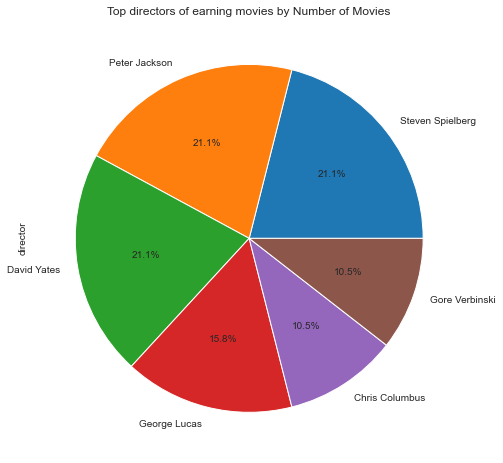

In [104]:
# Plotting top directors in terms of number of Movies 
df_rev.director.value_counts()[:6].plot(kind = 'pie', autopct = '%0.1f%%')
plt.title('Top directors of earning movies by Number of Movies');

In [105]:
# Top Directors in terms of highest Earning movies and then sorting them by revenue
df_director = df_rev[['director','original_title', 'revenue_adj_million', 'release_year']].sort_values('revenue_adj_million', ascending =False)[:9]

In [106]:
# printing first 10 values of Directors df
df_director[:10]

,director,original_title,revenue_adj_million,release_year
1386,James Cameron,Avatar,2827.0,2009
1329,George Lucas,Star Wars,2789.0,1977
5231,James Cameron,Titanic,2506.0,1997
10594,William Friedkin,The Exorcist,2167.0,1973
9806,Steven Spielberg,Jaws,1907.0,1975
3,J.J. Abrams,Star Wars: The Force Awakens,1902.0,2015
8889,Steven Spielberg,E.T. the Extra-Terrestrial,1791.0,1982
8094,Irwin Winkler,The Net,1583.0,1995
10110,Hamilton Luske,One Hundred and One Dalmatians,1574.0,1961


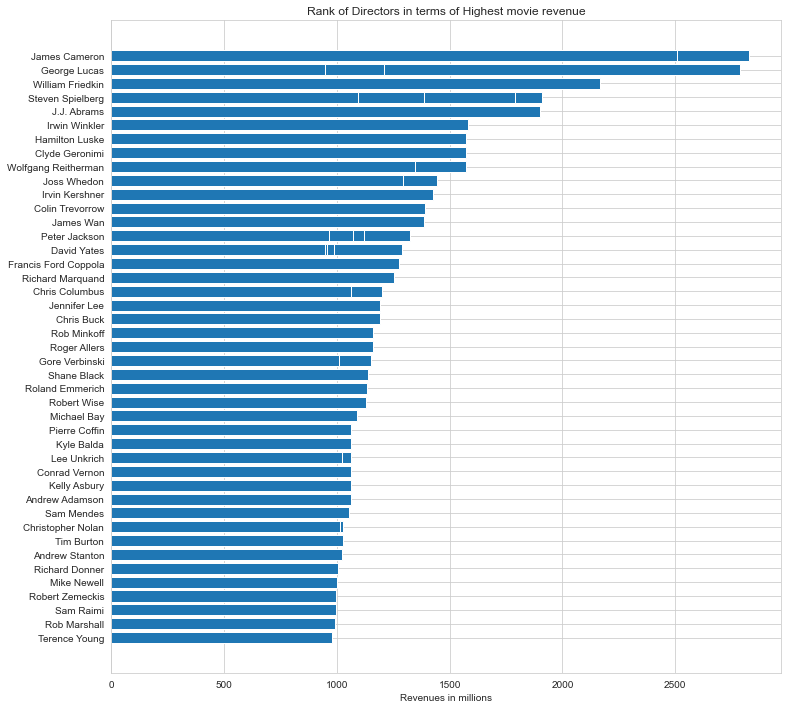

In [107]:
# plotting a bar graph for top directors
fig, ax = plt.subplots(figsize = (12,12))
ax.barh(df_rev.director, df_rev.revenue_adj_million)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title('Rank of Directors in terms of Highest movie revenue')
plt.xlabel('Revenues in millions')
plt.show();

##### - Top 5 Directors of the most successful movies in terms of revenue:
 
1-James Cameron 

2-George Lucas	

3-William Friedkin	

4-Steven Spielberg	

5-J.J. Abrams

<a id='conclusions'></a>
## Conclusions



#### Summary: 

- Popularity over the years 

Popularity increased drastically after 2010, this is probably due to wide use of internet services and increasing social media awareness. 

Most of the popularity Scores are between [0,10] , according to IMDB website help center, user ratings are between ( 1 - 10 ) a higher score indicates a better score for the movie

 - Popular genres :

Most Popular Genres are: Drama, Comedy, Action, Thriller	

 - Properties associated with movies that have high revenues:

1- Runtime is between 90 to 180 minutes

2- High vote count with a high vote average and high value of adjusted Budget.

3- Higher budget (over 100 million ) than average budget compared to other movies 

4- About Genres most favored( Adventure, Action, Family , Fantasy and Sci Fi)

Here's a [link](https://asistdl.onlinelibrary.wiley.com/doi/full/10.1002/asi.23213) to an analysis of Correlations between user voting data, budget, and box office for films in the internet movie database

One of the finding in the analysis stated that :
Budget is overwhelmingly the most relevant factor in determining a film's ultimate prominence

 - Top 5 Directors of most successful movies in terms of revenue:
 
1-James Cameron 

2-George Lucas	

3-William Friedkin	

4-Steven Spielberg	

5-J.J. Abrams

#### Limitations in the dataset:
It's a relatively large dataset containing alot of (Null values) and also Zero values in budget and revenue columns, I chose to drop null values, and focus my analysis on significantly successful movies in terms of adjusted revenue.

#### Dependant and Independant Variables:
I chose Movie's adjusted Revenue, popularity & Vote_count as dependant Variables, the other independant variables are (Movie's Runtime, adjusted Budget, Genres & directors)
I make no implications on the correlations between these variables because I made no statistical tests, simply Plotted these variables using visualizations and wrote down some of the notes observed. 
